## Titanic Data Exploration ##

***

Over the past several weeks, you've learned the code about how to explore and manipulate a dataset. Now it's time to practice what you've learned on a real-world dataset. 

***

### Titanic Dataset

The titanic dataset holds information about the passengers on the titanic. This includes passenger name, characteristics, and if they survived the accident. The dataset has the following columns:

    * pclass = passenger class; 1 = first class, 2 = second class, 3 = third class
    * survived = passenger survival; 1 = survived, 0 = did not survive
    * name = passenger name
    * sex = sex of passenger
    * age = age of passenger
    * sibsp = # of siblings / spouses aboard the Titanic
    * parch = # of parents / children aboard the Titanic
    * ticket = ticket number
    * fare = fare paid by passenger
    * cabin = passenger cabin
    * embarked = port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton
    * boat = lifeboat assignment 
    * body = recovered body number
    * home dest = anticipated home destination 
    
If you need some additional motivation before starting, please visit: https://www.youtube.com/watch?v=3gK_2XdjOdY

### How to work through the dataset:

Follow the prompts below to explore, manipulate, and visualize aspects of the dataset. Working with data takes time, so take your time as you start with a messy dataset and turn it into something that shows meaningful visualizations. 

***


### Import Libraries and Dataset

* Review the entire notebook to determine what you will be expected to do - then, import the necessary libraries
* Import the titanic.xlsx dataset

In [31]:
import pandas as pd
import numpy as np #numpy is a library for maths lybrary 
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt
%matplotlib inline

In [34]:
df = pd.read_excel("titanic.xlsx")

### Determine the Characteristics of the Dataset

   * How many columns are in this dataset?
   * How many rows are in this dataset?
   * What types of data are in each column? Does this make sense with that you know about that column?
   * Which variables are numeric? Which variables are categorical? What other variables are left outside of these two groups?
   * Which variable could be considered a 'dependent' variable?

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [36]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [37]:
df.shape

(1309, 14)

### Identify the Missing Data in the Dataset

   * Is there any missing data?
   * Which columns have any missing data?
   * Which column has the most missing information? Which column has the least?

In [46]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [48]:
#age cabin embarked boat body home.dest 
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [49]:
## Create a copy of original dataset
df2 = df.copy()

### Handling the Missing Data in the Dataset

   * Remove the columns with excessive missing data (any column missing greater than 500 rows)
   * When there is very little missing data, we can make replacements. Replace the missing data for the "embarked" column with the most common embarkation point. 
   * Replace the missing data in "fare" with the average fare of the entire sample. 
   * Remove the rows in the dataset that has missing "age" data. 
   * Recheck is there is any data missing in the dataset. 

In [50]:
#Remove the columns with excessive missing data (any column missing greater than 500 rows)
df2.drop(['cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)
df2.shape

(1309, 10)

In [51]:
#When there is very little missing data, we can make replacements. Replace the missing data for the "embarked" 
            #column with the most common embarkation point.

## where are the rows that have missing data in a specific column?
df2.loc[df2["embarked"].isnull()]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [52]:
#df2["embarked"].replace("NaN", ["S"], inplace = True)
df2["embarked"].fillna("S", inplace = True)
df2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C


In [54]:
#Replace the missing data in "fare" with the average fare of the entire sample.
#cheking the average 
df2["fare"].mean()

33.29547928134572

In [55]:
df2.loc[df2["fare"].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [60]:
#replacing
df2["fare"].fillna(33.29547928134572, inplace = True)


In [61]:
#check back again for null
df2.loc[df2["fare"].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked


In [63]:
#check the missing from age
df2.loc[df2["age"].isnull()].sum()

C:\Users\eyoba\AppData\Local\Temp\ipykernel_16672\3832688401.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.loc[df2["age"].isnull()].sum()


pclass                                                    695
survived                                                   73
name        Baumann, Mr. John DBradley, Mr. George ("Georg...
sex         malemalemalemalefemalefemalemalemalemalemalefe...
age                                                       0.0
sibsp                                                     127
parch                                                      64
fare                                                 5213.533
embarked    SSCSCSSSSSSCSSSCSSSCSSCCCCSSCSSSSCCSCSSSSSSQSQ...
dtype: object

In [66]:
#Remove the rows in the dataset that has missing "age" data.
df2.dropna(subset=["age"], inplace = True)


In [67]:
df2.loc[df2["age"].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked


In [70]:
#Recheck is there is any data missing in the dataset.
df2.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

### Creating Columns and Replacing Labels

   * Create descriptive labels for the categorical columns: pclass, survived, and embarked. Instead of the coding that shows in the dataset, create labels to describe what each category represents (i.e. in the embarked column S = Southhampton)
   * Create a new column called "Titanic Passenger" and make all values 1
   * Create a new column called "Family Size" - this column should equal the total number of family members each passenger was traveling with.
   * Create a column called "Travel Alone" - this column should be 1 if the passenger was traveling alone, and 0 if the passenger was traveling with family. 
   * Create a column called "Has Caregiver" - this column should have a value of 1 if a passenger is less than 13-years old AND the passenger is traveling with at least one family member, otherwise the value should be 0. 
   * Create a column called "Crew" - this column should be 1 if the passenger paid 0 dollars for their ticket, and 0 otherwise. 
   * Create a column called "Age Group" to group passengers by their age (create five categories: infant, child, teen, adult, senior). You can use bins to complete this (or any other method you like). You define the cutoff points for each group you create. 
   
After create new columns, replace the basic coding "0/1" with meaningful labels. 

In [71]:
df2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1301,3,0,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,C
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C


In [75]:
#Create descriptive labels for the categorical columns: pclass, survived, and embarked. Instead of the coding that shows 
    #in the dataset, create labels to describe what each category represents (i.e. in the embarked column S = Southhampton)

df2["pclass"].replace([1,2,3], ["class1","class2", "class3"], inplace=True)
df2["survived"].replace([0,1], ["not survived", "survived"], inplace=True)
df2["embarked"].replace(["C","Q","S"], ["Cherbourg","Queenstown", "Southampton"], inplace=True)

df2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,class1,survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton
1,class1,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton
2,class1,not survived,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton
3,class1,not survived,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southampton
4,class1,not survived,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southampton
...,...,...,...,...,...,...,...,...,...,...
1301,class3,not survived,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,Cherbourg
1304,class3,not survived,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,Cherbourg
1306,class3,not survived,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,Cherbourg
1307,class3,not survived,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,Cherbourg


In [76]:
#Create a new column called "Titanic Passenger" and make all values 1
df2["Titanic Passenger"] = 1
df2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger
0,class1,survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton,1
1,class1,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton,1
2,class1,not survived,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton,1
3,class1,not survived,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southampton,1
4,class1,not survived,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...
1301,class3,not survived,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,Cherbourg,1
1304,class3,not survived,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,Cherbourg,1
1306,class3,not survived,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,Cherbourg,1
1307,class3,not survived,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,Cherbourg,1


In [78]:
#Create a new column called "Family Size" - this column should equal the total number of family members each 
    #passenger was traveling with.
df2["Family Size"] = df2['sibsp'] + df2['parch']
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size
0,class1,survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton,1,0
1,class1,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton,1,3
2,class1,not survived,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton,1,3
3,class1,not survived,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southampton,1,3
4,class1,not survived,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southampton,1,3


In [79]:
#Create a column called "Travel Alone" - this column should be 1 if the passenger was traveling alone, and 0 if the passenger 
    #was traveling with family.
df2["Travel Alone"] = np.where(df2["Family Size"] == 0, "Alone", "With Family")
df2.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Travel Alone
0,class1,survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton,1,0,Alone
1,class1,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton,1,3,With Family
2,class1,not survived,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton,1,3,With Family
3,class1,not survived,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southampton,1,3,With Family
4,class1,not survived,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southampton,1,3,With Family


In [81]:
#Create a column called "Has Caregiver" - this column should have a value of 1 if a passenger is less than 13-years old 
    #AND the passenger is traveling with at least one family member, otherwise the value should be 0.

df2["Has Caregiver"] = np.where((df2["age"] <= 13) & (df2["Family Size"] > 0) , 1, 0)
df2.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Travel Alone,Has Caregiver
0,class1,survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton,1,0,Alone,0
1,class1,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton,1,3,With Family,1
2,class1,not survived,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton,1,3,With Family,1
3,class1,not survived,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southampton,1,3,With Family,0
4,class1,not survived,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southampton,1,3,With Family,0


In [83]:
#Create a column called "Crew" - this column should be 1 if the passenger paid 0 dollars for their ticket, and 0 otherwise.

df2["Crew"] = np.where(df2["fare"] == 0, 0, 1)
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Travel Alone,Has Caregiver,Crew
0,class1,survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton,1,0,Alone,0,1
1,class1,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton,1,3,With Family,1,1
2,class1,not survived,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton,1,3,With Family,1,1
3,class1,not survived,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southampton,1,3,With Family,0,1
4,class1,not survived,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southampton,1,3,With Family,0,1


In [85]:
#Create a column called "Age Group" to group passengers by their age (create five categories: infant, child, teen, adult, senior). 
#You can use bins to complete this (or any other method you like). You define the cutoff points for each group you create.
#infant = 0 -2
#child = 2.1 - 13
#teen = 13.1 - 18
#adult = 18.1-65
#senior = 65+
bins = [0, 2, 13, 18, 65, 150]
bin_names = ["infant", "child", "teen", "adult", "senior"]
df2["Age Group"] = pd.cut(df2["age"], bins, labels = bin_names)
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Travel Alone,Has Caregiver,Crew,Age Group
0,class1,survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton,1,0,Alone,0,1,adult
1,class1,survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton,1,3,With Family,1,1,infant
2,class1,not survived,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton,1,3,With Family,1,1,infant
3,class1,not survived,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southampton,1,3,With Family,0,1,adult
4,class1,not survived,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southampton,1,3,With Family,0,1,adult


### Determine Frequencies of Groups

* How many passengers fall into each category? Determine how many passengers fall into each group for <b>each</b> categorical vairable (including the ones you just created). 

In [90]:
df2["pclass"].value_counts()

class3    501
class1    284
class2    261
Name: pclass, dtype: int64

In [91]:
df2["survived"].value_counts()

not survived    619
survived        427
Name: survived, dtype: int64

In [92]:
df2["sex"].value_counts()

male      658
female    388
Name: sex, dtype: int64

In [93]:
df2["embarked"].value_counts()

Southampton    784
Cherbourg      212
Queenstown      50
Name: embarked, dtype: int64

In [94]:
df2["Travel Alone"].value_counts()

Alone          590
With Family    456
Name: Travel Alone, dtype: int64

In [95]:
df2["Has Caregiver"].value_counts()

0    951
1     95
Name: Has Caregiver, dtype: int64

In [96]:
df2["Crew"].value_counts()

1    1038
0       8
Name: Crew, dtype: int64

In [97]:
df2["Age Group"].value_counts()

adult     843
teen       94
child      65
infant     34
senior     10
Name: Age Group, dtype: int64

In [105]:
pd.crosstab(df2["sex"], df2["Age Group"], margins=True, normalize=True)

Age Group,infant,child,teen,adult,senior,All
sex,,,,,,
female,0.015296,0.028681,0.043977,0.282027,0.000956,0.370937
male,0.017208,0.033461,0.045889,0.523901,0.008604,0.629063
All,0.032505,0.062141,0.089866,0.805927,0.009560,1.000000


### Determine the Distribution of Numeric Data

* What are the summary statistics for <b>each</b> numeric variable in the dataset? Summary statistics include:
    * Mean
    * Median
    * Mode
    * Standard Deviation
    * Range

In [100]:
df2.describe()

,age,sibsp,parch,fare,Titanic Passenger,Family Size,Has Caregiver,Crew
count,1046.000000,1046.000000,1046.00000,1046.000000,1046.0,1046.000000,1046.000000,1046.000000
mean,29.881135,0.502868,0.42065,36.682839,1.0,0.923518,0.090822,0.992352
std,14.413500,0.912167,0.83975,55.705959,0.0,1.452891,0.287494,0.087160
min,0.166700,0.000000,0.00000,0.000000,1.0,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.00000,8.050000,1.0,0.000000,0.000000,1.000000
50%,28.000000,0.000000,0.00000,15.800000,1.0,0.000000,0.000000,1.000000
75%,39.000000,1.000000,1.00000,35.500000,1.0,1.000000,0.000000,1.000000
max,80.000000,8.000000,6.00000,512.329200,1.0,10.000000,1.000000,1.000000


In [104]:
print(f"The mean of age: ", df2["age"].mean())                  #AVERAGE OF ALL VALUES
print(f"The median of age: ", df2["age"].median())            #CENTER VALUE
print(f"The mode of age: ", df2["age"].mode())                # MOST FREQUENT VALUE
age_tange = df2['age'].max() - df2['age'].min()
print(sibslinges_tange)

The mean of sibling:  29.8811345124283
The median of sibling:  28.0
The mode of Sibling:  0    24.0
Name: age, dtype: float64
8


In [103]:
print(f"The mean of sibling: ", df2["sibsp"].mean())
print(f"The median of sibling: ", df2["sibsp"].median())
print(f"The mode of Sibling: ", df2["sibsp"].mode())
sibslinges_range = df2['sibsp'].max() - df2['sibsp'].min()
print(sibslinges_ange)

The mean of sibling:  0.502868068833652
The median of sibling:  0.0
The mode of Sibling:  0    0
Name: sibsp, dtype: int64
8


### Relationships between Variables

* Determine the relationship between each variable and the variable "survived". This is our primary variable of interest -- did this passenger survive the accident? Did the characteristics of the passenger have any relationship with their survival?
    * <b>pclass</b>: how many survivors are in each passenger class? does a pattern emerge? which class has the most survivors? which has the least?
    * <b>sex</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>age</b>: how does the average age of the passenger differ based on survival group? 
    * <b>age group</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>family size</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>travel alone</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>crew</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>has caregiver</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>fare</b>: how does the average fare the passenger paid differ based on survival group? 
    * <b>embarked</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    
Based on what you learn working through this section, make (2) statements about what characteristics of passenger most influenced their survival.

In [107]:
pd.crosstab(df2["pclass"], df2["survived"], margins=True)

survived,not survived,survived,All
pclass,,,
class1,103,181,284
class2,146,115,261
class3,370,131,501
All,619,427,1046


In [109]:
pd.crosstab(df2["sex"], df2["survived"], margins=True)

survived,not survived,survived,All
sex,,,
female,96,292,388
male,523,135,658
All,619,427,1046


In [110]:
pd.crosstab(df2["Age Group"], df2["survived"], margins=True)

survived,not survived,survived,All
Age Group,,,
infant,13,21,34
child,29,36,65
teen,56,38,94
adult,513,330,843
senior,8,2,10
All,619,427,1046


In [111]:
df2["age"].groupby(df2["survived"]).mean()

survived
not survived    30.545369
survived        28.918228
Name: age, dtype: float64

In [113]:
pd.crosstab(df2["Crew"], df2["survived"], margins=True)

survived,not survived,survived,All
Crew,,,
0,6,2,8
1,613,425,1038
All,619,427,1046


In [114]:
pd.crosstab(df2["Travel Alone"], df2["survived"], margins=True)

survived,not survived,survived,All
Travel Alone,,,
Alone,402,188,590
With Family,217,239,456
All,619,427,1046


In [118]:

df2["fare"].groupby(df2["survived"]).mean()

survived
not survived    25.161913
survived        53.384134
Name: fare, dtype: float64

In [119]:
pd.crosstab(df2["embarked"], df2["survived"], margins=True)

survived,not survived,survived,All
embarked,,,
Cherbourg,80,132,212
Queenstown,37,13,50
Southampton,502,282,784
All,619,427,1046


### Visualize your Results

* Using the most interesting (from your POV) results from the above section, create (3) visualizations to illustrate the results. 
* Create a barplot to show the variation in average age across passenger class. On average, which passenger class has the oldest passengers?
* Create a violin plot to show the distribution of age across passenger class. 

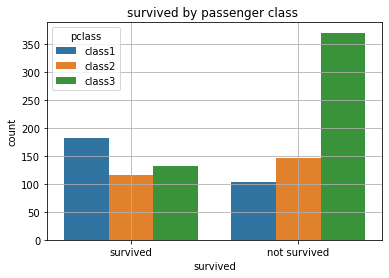

In [120]:
### survived by passenger class 

sns.countplot(data = df2, x = "survived", hue = "pclass")
plt.title('Survived by passenger class ')
plt.grid()


Text(0.5, 1.0, 'Survived by sex ')

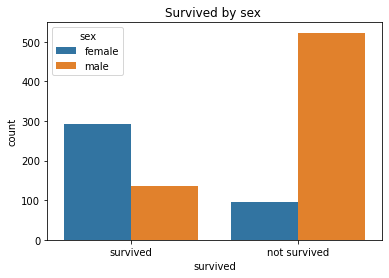

In [123]:
#
sns.countplot(data = df2, x = "survived", hue = "sex")
plt.title('Survived by sex ')


<AxesSubplot:xlabel='survived', ylabel='Family Size'>

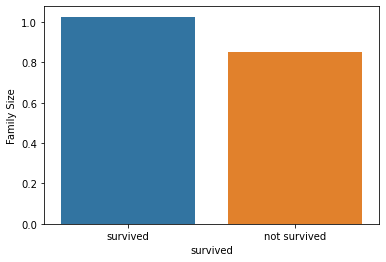

In [129]:
sns.barplot(data = df2, x = "survived", y = "Family Size", ci=None)

<AxesSubplot:xlabel='pclass', ylabel='age'>

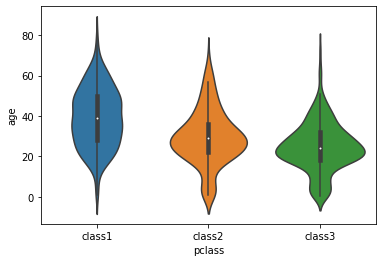

In [127]:
sns.violinplot(x = df2["pclass"], y = df["age"])